In [ ]:
import pycbc
import pylab

from itertools import izip

In [59]:
from pycbc.catalog import Merger

event = { #chirpmass = chirpmass_in_local_frame * (1 + redshift) (not sure why?? but done in GW170817 tutorial)
    "GW170817": {"name": "GW170817", "chirpmass": 1.188 * (1 + 0.008), "massratio": 0.525},
    "GW170608": {"name": "GW170608", "chirpmass": 7.9 * (1 + 0.07), "massratio": 0.6},
    "GW170814": {"name": "GW170814", "chirpmass": 24.1 * (1 + 0.11), "massratio": 1.21},
}["GW170814"]

ifos = ['H1', 'L1']

In [60]:
# Generate a gravitational waveform model similar to GW170817

from pycbc.waveform import get_td_waveform
from pycbc.conversions import mass1_from_mchirp_q, mass2_from_mchirp_q

# We'll just assume the neutron stars were equal mass
# for this test and convert to detector frame coordinates
mchirp = event["chirpmass"]
mass1 = mass2 = mass1_from_mchirp_q(mchirp, 1)
#unequal mass, ratio from https://arxiv.org/abs/1711.08577
mass1_neq = mass1_from_mchirp_q(mchirp, event["massratio"])
mass2_neq = mass2_from_mchirp_q(mchirp, event["massratio"])

print(mass1_neq,mass2_neq)

(33.83238577496454, 27.960649400797138)


In [100]:
t_window = 0.25 #s

In [101]:
hp, hc = get_td_waveform(approximant="TaylorT2",
                f_lower=20, delta_t=1.0/16384,
                mass1=mass1, mass2=mass2)

In [102]:
hp_neq, hc_neq = get_td_waveform(approximant="TaylorT2",
                f_lower=20, delta_t=1.0/16384,
                mass1=mass1_neq, mass2=mass2_neq)

In [103]:
hp_neq_seo, hc_neq_seo = get_td_waveform(approximant="SEOBNRv2",
                f_lower=20, delta_t=1.0/16384,
                mass1=mass1_neq, mass2=mass2_neq)

In [104]:
end_neq_seo = len(hp_neq_seo.sample_times)/16384.
end_neq = len(hp_neq.sample_times)/16384.

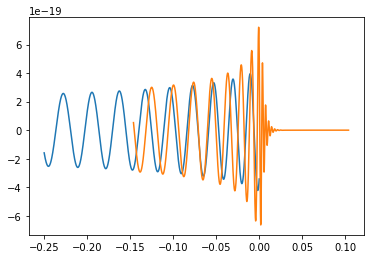

In [105]:
pylab.plot(hp_neq.sample_times[int(16384*(end_neq-t_window)):],hp_neq[int(16384*(end_neq-t_window)):],
           hp_neq_seo.sample_times[int(16384*(end_neq_seo-t_window)):],hp_neq_seo[int(16384*(end_neq_seo-t_window)):])

In [106]:
len(hp)

12667

In [107]:
end=len(hp.sample_times)/16384.
end

0.77313232421875

In [108]:
end_neq=len(hp_neq.sample_times)/16384.
end_neq

0.77044677734375

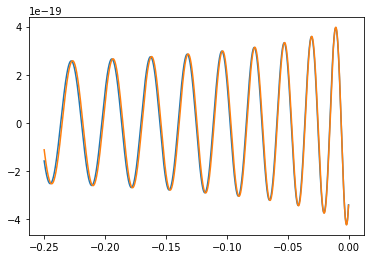

In [109]:
pylab.plot(hp_neq.sample_times[int(16384*(end_neq-t_window)):],hp_neq[int(16384*(end_neq-t_window)):],
           hp.sample_times[int(16384*(end-t_window)):],hp[int(16384*(end-t_window)):])

In [110]:
all(pt==ct for pt, ct in zip(hp_neq_seo.sample_times[int(16384*(end_neq_seo-t_window)):],
                             hc_neq_seo.sample_times[int(16384*(end_neq_seo-t_window)):]))

True

In [111]:
with open(event['name']+"_neq_seo.csv", "w") as f:
    for t, p, c in zip(hp_neq_seo.sample_times[int(16384*(end_neq_seo-t_window)):],
                       hp_neq_seo[int(16384*(end_neq_seo-t_window)):],
                       hc_neq_seo[int(16384*(end_neq_seo-t_window)):]):
        f.write("{},{},{}\n".format(t,p,c))